<a href="https://colab.research.google.com/github/Saya-Sayita/Challenge1-Python/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, Markdown

# Leemos los archivos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregamos una columna indicando la tienda de origen
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Unimos todos los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
#tienda1.head()
df

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


#1. Análisis de facturación



In [49]:
# 1. FACTURACIÓN TOTAL POR TIENDA

# Función para calcular facturación total
def calcular_facturacion(data):
    # Multiplica precio * cantidad vendida
    return (data["Precio"] * data["Cantidad de cuotas"]).sum()

# Calculamos la facturación para cada tienda
facturaciones = {
    "Tienda 1": calcular_facturacion(tienda1),
    "Tienda 2": calcular_facturacion(tienda2),
    "Tienda 3": calcular_facturacion(tienda3),
    "Tienda 4": calcular_facturacion(tienda4),
}

for tienda, valor in facturaciones.items():
    print(f"{tienda} - Facturación Total: ${valor:,.2f}")

# Facturación total de todas las tiendas
facturacion_total = sum(facturaciones.values())
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:,.2f}\n")

Tienda 1 - Facturación Total: $3,422,717,700.00
Tienda 2 - Facturación Total: $3,337,189,200.00
Tienda 3 - Facturación Total: $3,243,816,900.00
Tienda 4 - Facturación Total: $3,098,827,200.00

Facturación total de todas las tiendas: $13,102,551,000.00



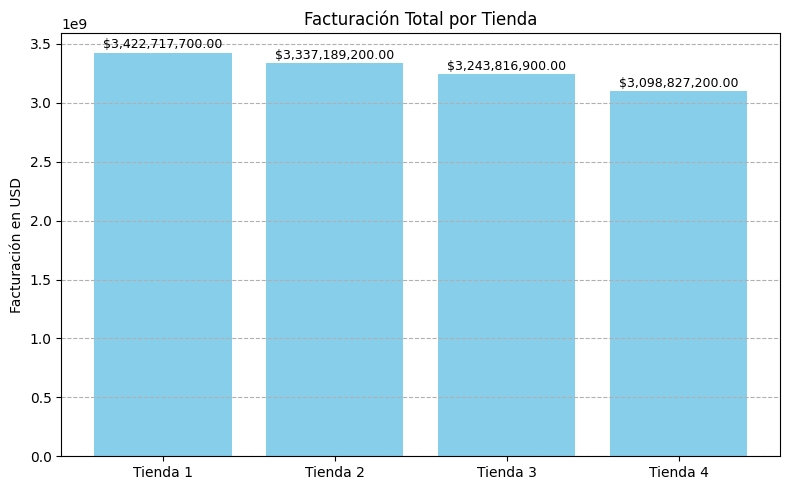

In [50]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(list(facturaciones.keys()), list(facturaciones.values()), color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación en USD')
plt.grid(axis='y', linestyle='--')
# Añadir etiquetas numéricas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + facturacion_total * 0.001,  # Espacio por encima
        f"${height:,.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

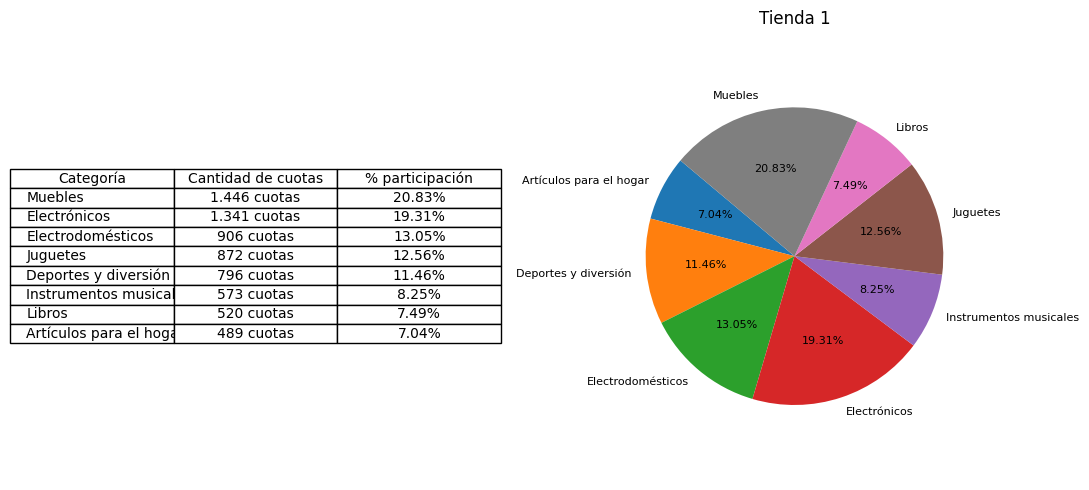

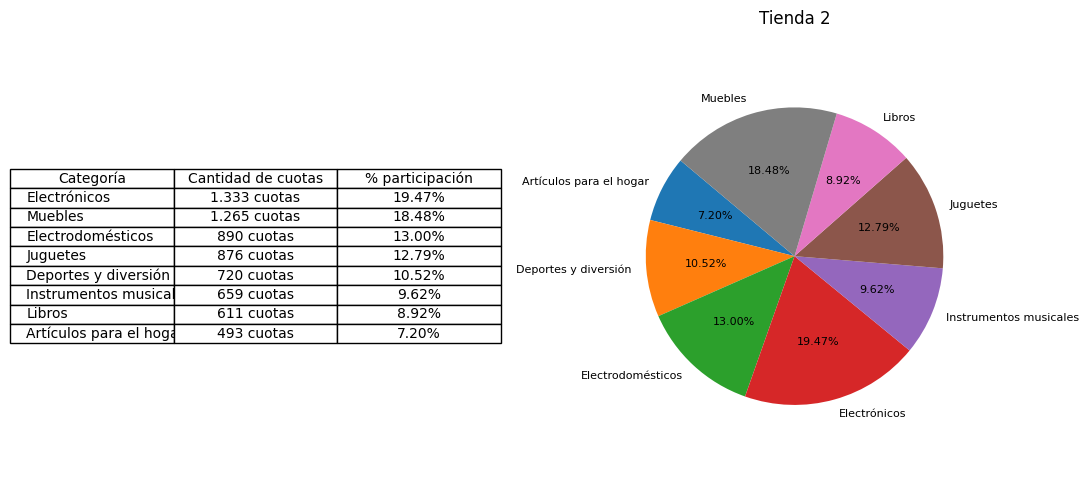

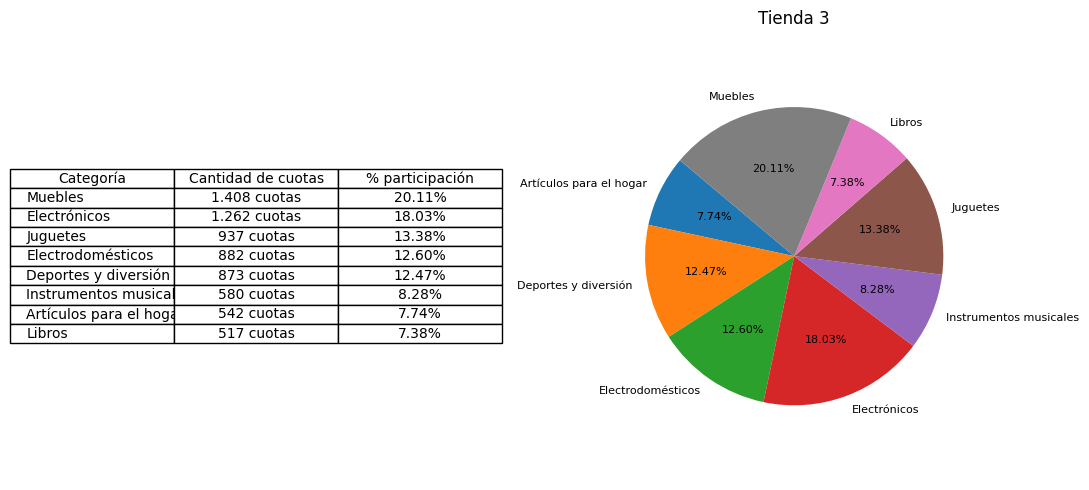

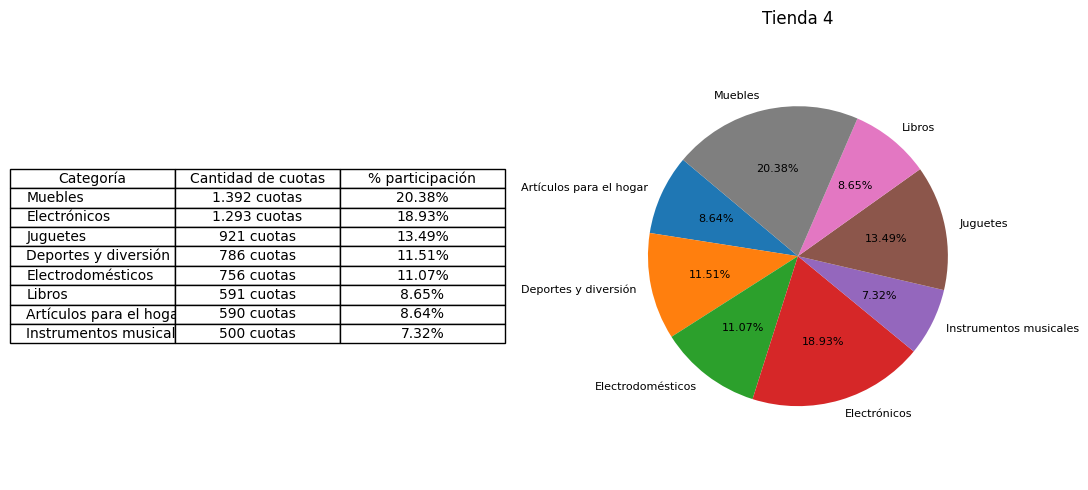

In [75]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt


df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Función para mostrar tabla y gráfico por tienda
def mostrar_ventas_por_categoria(df, nombre_tienda):
    display(HTML(f"<h3 style='font-weight:bold;'>VENTAS POR CATEGORÍA DE {nombre_tienda.upper()}</h3>"))
    data_tienda = df[df['tienda'] == nombre_tienda]
    resumen = data_tienda.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().reset_index()
    resumen = resumen.sort_values(by="Cantidad de cuotas", ascending=False)
    total = resumen["Cantidad de cuotas"].sum()
    resumen["% participación"] = (resumen["Cantidad de cuotas"] / total * 100).apply(lambda x: f"{x:.2f}%")
    resumen["Cantidad de cuotas"] = resumen["Cantidad de cuotas"].apply(lambda x: f"{int(x):,}".replace(",", ".") + " cuotas")
    resumen = resumen.rename(columns={"Categoría del Producto": "Categoría"})
    resumen = resumen[["Categoría", "Cantidad de cuotas", "% participación"]]

    # Mostrar tabla y gráfico en una misma figura
    fig, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [1.5, 1]})
    axs[0].axis('off')
    tabla = axs[0].table(cellText=resumen.values,
                         colLabels=resumen.columns,
                         cellLoc='center',
                         loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    for i in range(len(resumen)):
        tabla[i + 1, 0].get_text().set_ha('left')

    valores = data_tienda.groupby("Categoría del Producto")["Cantidad de cuotas"].sum()
    axs[1].pie(valores.values,
               labels=valores.index,
               autopct='%1.2f%%',
               startangle=140,
               textprops={'fontsize': 8})
    axs[1].set_title(f'{nombre_tienda}', fontsize=12)
    axs[1].axis('equal')
    plt.tight_layout()
    plt.show()

# Ejecutar para cada tienda
for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mostrar_ventas_por_categoria(df, tienda)

# 3. Calificación promedio de la tienda


### Promedio de calificación de cada tienda:



Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00




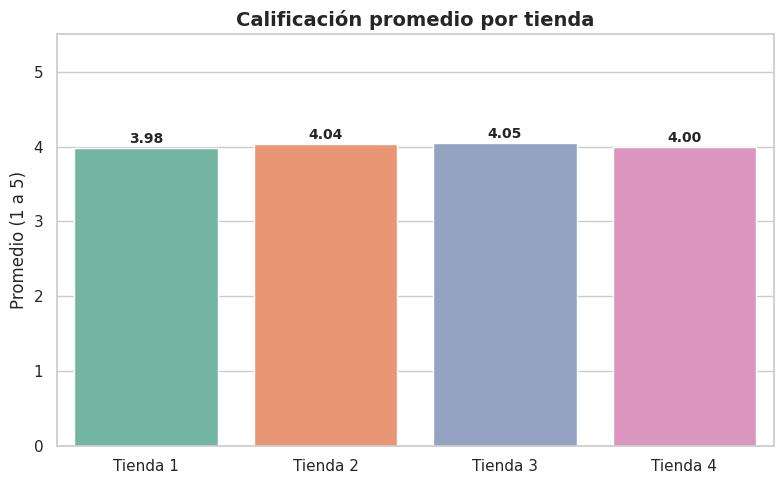

In [76]:
from IPython.display import display, HTML, Markdown

# Desactivar warnings innecesarios (como FutureWarning de Seaborn)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def calificacion_promedio(data):
    return data["Calificación"].mean()

def mostrar_calificacion_promedio(data, nombre_tienda):
    promedio = calificacion_promedio(data)
    print(f"{nombre_tienda} - Calificación promedio: {promedio:.2f}")
    return promedio

# Calcular promedios y almacenar resultados
display(Markdown("### Promedio de calificación de cada tienda:"))
resultados = []
print('\n')

for tienda in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    data_tienda = df[df['tienda'] == tienda]
    promedio = mostrar_calificacion_promedio(data_tienda, tienda)
    resultados.append({"Tienda": tienda, "Calificación promedio": promedio})

# Crear DataFrame de resultados
df_promedios = pd.DataFrame(resultados)
df_promedios = df_promedios.sort_values("Tienda", ascending=True)


# Configuración del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras (evita advertencias)
bars = sns.barplot(
    data=df_promedios,
    x="Tienda",
    y="Calificación promedio",
    palette="Set2"
)

# Añadir etiquetas numéricas sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Estética final
plt.ylim(0, 5.5)
print('\n')
plt.title("Calificación promedio por tienda", fontsize=14, fontweight='bold')
plt.ylabel("Promedio (1 a 5)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

### **PRODUCTOS MAS Y MENOS VENDIDOS POR TIENDA**

#### **TIENDA 1**

Clasificación       Producto                                     Cantidad de cuotas
-----------------------------------------------------------------------------------
Más vendido         Secadora de ropa                             214 cuotas
Menos vendido       Celular ABXY                                 78 cuotas


#### **TIENDA 2**

Clasificación       Producto                                     Cantidad de cuotas
-----------------------------------------------------------------------------------
Más vendido         Iniciando en programación                    223 cuotas
Menos vendido       Mesa de comedor                              89 cuotas


#### **TIENDA 3**

Clasificación       Producto                                     Cantidad de cuotas
-----------------------------------------------------------------------------------
Más vendido         Bicicleta                                    191 cuotas
Menos vendido       TV LED UHD 4K                                94 cuotas


#### **TIENDA 4**

Clasificación       Producto                                     Cantidad de cuotas
-----------------------------------------------------------------------------------
Más vendido         Dashboards con Power BI                      196 cuotas
Menos vendido       Armario                                      88 cuotas




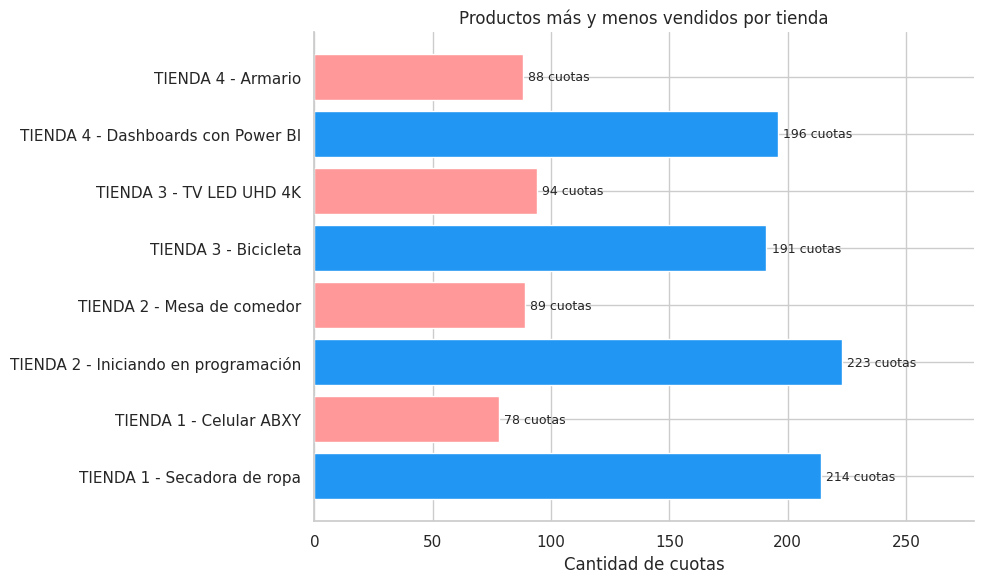

In [137]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

display(Markdown("### **PRODUCTOS MAS Y MENOS VENDIDOS POR TIENDA**"))

# Datos por tienda
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']

# Para gráfico único
etiquetas = []
productos = []
cuotas = []
colores = []

# Texto por tienda
for i, tienda in enumerate(tiendas):
    resumen = tienda.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
    producto_mas_vendido = resumen.idxmax()
    cuotas_mas_vendido = int(resumen.max())
    producto_menos_vendido = resumen.idxmin()
    cuotas_menos_vendido = int(resumen.min())

    # Título de tienda
    display(Markdown(f"#### **{nombres_tiendas[i]}**"))

    # Texto alineado
    print("Clasificación".ljust(20) + "Producto".ljust(45) + "Cantidad de cuotas")
    print("-" * 83)
    print("Más vendido".ljust(20) + producto_mas_vendido.ljust(45) + f"{cuotas_mas_vendido:,}".replace(",", ".") + " cuotas")
    print("Menos vendido".ljust(20) + producto_menos_vendido.ljust(45) + f"{cuotas_menos_vendido:,}".replace(",", ".") + " cuotas")

    # Para el gráfico
    etiquetas.append(f"{nombres_tiendas[i]} - {producto_mas_vendido}")
    productos.append(producto_mas_vendido)
    cuotas.append(cuotas_mas_vendido)
    colores.append('#2196F3')  # Azul

    etiquetas.append(f"{nombres_tiendas[i]} - {producto_menos_vendido}")
    productos.append(producto_menos_vendido)
    cuotas.append(cuotas_menos_vendido)
    colores.append('#FF9999')  # Rojo
print('\n')
# Gráfico único agrupado
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(etiquetas, cuotas, color=colores)

for bar in bars:
    ancho = bar.get_width()
    ax.text(ancho + max(cuotas) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(ancho):,}".replace(",", ".") + " cuotas",
            va='center', fontsize=9)

ax.set_xlabel("Cantidad de cuotas")
ax.set_xlim(0, max(cuotas) * 1.25)
ax.set_title("Productos más y menos vendidos por tienda")
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
def costo_envio_promedio(data):
    return data["Costo de envío"].mean()

def mostrar_costo_envio_promedio(data, nombre_tienda):
    promedio = costo_envio_promedio(data)
    print(f"{nombre_tienda} - Costo de envío promedio: ${promedio:,.2f}")

for t in ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']:
    mostrar_costo_envio_promedio(df[df['tienda'] == t], t)

Tienda 1 - Costo de envío promedio: $26,018.61
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46
